# Combining VBF and ggF templates

Need to update this since pass regions' names have changed to pass_ggf and pass_vbf even for separate templates

Author(s): Raghav Kansal

In [1]:
import pickle
import json
from pathlib import Path
from HH4b.hh_vars import years

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
templates_path = Path("src/HH4b/postprocessing/templates/24May16")

## Combining templates

In [32]:
templates = {}
year = "2022-2023"

with (templates_path / f"{year}_templates.pkl").open("rb") as f:
    templates = pickle.load(f)

In [33]:
templates

{'pass_bin1': Hist(
   StrCategory(['data', 'hh4b', 'vbfhh4b-k2v0', 'qcd', 'hh4b_txbb_down', 'vbfhh4b-k2v0_txbb_down', 'hh4b_txbb_up', 'vbfhh4b-k2v0_txbb_up'], name='Sample'),
   Regular(16, 60, 220, name='H2PNetMass', label='$m^{2}_\\mathrm{reg}$ (GeV)'),
   storage=Weight()) # Sum: WeightedSum(value=29.3099, variance=15.3599),
 'pass_bin2': Hist(
   StrCategory(['data', 'hh4b', 'vbfhh4b-k2v0', 'qcd', 'hh4b_txbb_down', 'vbfhh4b-k2v0_txbb_down', 'hh4b_txbb_up', 'vbfhh4b-k2v0_txbb_up'], name='Sample'),
   Regular(16, 60, 220, name='H2PNetMass', label='$m^{2}_\\mathrm{reg}$ (GeV)'),
   storage=Weight()) # Sum: WeightedSum(value=323.319, variance=637.95),
 'pass_bin3': Hist(
   StrCategory(['data', 'hh4b', 'vbfhh4b-k2v0', 'qcd', 'hh4b_txbb_down', 'vbfhh4b-k2v0_txbb_down', 'hh4b_txbb_up', 'vbfhh4b-k2v0_txbb_up'], name='Sample'),
   Regular(16, 60, 220, name='H2PNetMass', label='$m^{2}_\\mathrm{reg}$ (GeV)'),
   storage=Weight()) # Sum: WeightedSum(value=9793.41, variance=21139.3) (Weighted

## Testing JEC JMC plots

In [34]:
import hist
from hist import Hist
import numpy as np
from HH4b.hh_vars import jecs, jmsr, bg_keys, sig_keys, LUMI
from HH4b import utils, plotting, postprocessing
from HH4b.postprocessing import datacardHelpers, Region
import warnings
from pathlib import Path

In [35]:
main_plot_dir = Path("plots/PostProcessing/24May16/Templates")


selection_regions = {
    "pass_bin1": Region(
        cuts={
            "Category": [1, 2],
        },
        label="Bin1",
    ),
    "pass_bin2": Region(
        cuts={
            "Category": [2, 3],
        },
        label="Bin2",
    ),
    "pass_bin3": Region(
        cuts={
            "Category": [3, 4],
        },
        label="Bin3",
    ),
    "fail": Region(
        cuts={
            "Category": [4, 5],
        },
        label="Fail",
    ),
}

In [36]:
def combine_hists(*hists):
    csamples = []
    for h in hists:
        csamples += list(h.axes[0])

    reth = Hist(
        hist.axis.StrCategory(csamples, name="Sample"),
        *hists[0].axes[1:],
        storage="weight",
    )

    for h in hists:
        for sample in h.axes[0]:
            reth.view(flow=True)[utils.get_key_index(reth, sample), ...] = h[sample, ...].view(
                flow=True
            )

    return reth

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import mplhep as hep

plt.style.use(hep.style.CMS)
hep.style.use("CMS")
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))

# this is needed for some reason to update the font size for the first plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
plt.rcParams.update({"font.size": 24})
plt.close()

Hist(
  StrCategory(['data', 'hh4b', 'vbfhh4b-k2v0', 'qcd', 'hh4b_txbb_down', 'vbfhh4b-k2v0_txbb_down', 'hh4b_txbb_up', 'vbfhh4b-k2v0_txbb_up', 'data_JES_up', 'hh4b_JES_up', 'vbfhh4b-k2v0_JES_up', 'qcd_JES_up', 'data_JES_down', 'hh4b_JES_down', 'vbfhh4b-k2v0_JES_down', 'qcd_JES_down'], name='Sample'),
  Regular(16, 60, 220, name='H2PNetMass', label='$m^{2}_\\mathrm{reg}$ (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=87.9296, variance=46.0797)


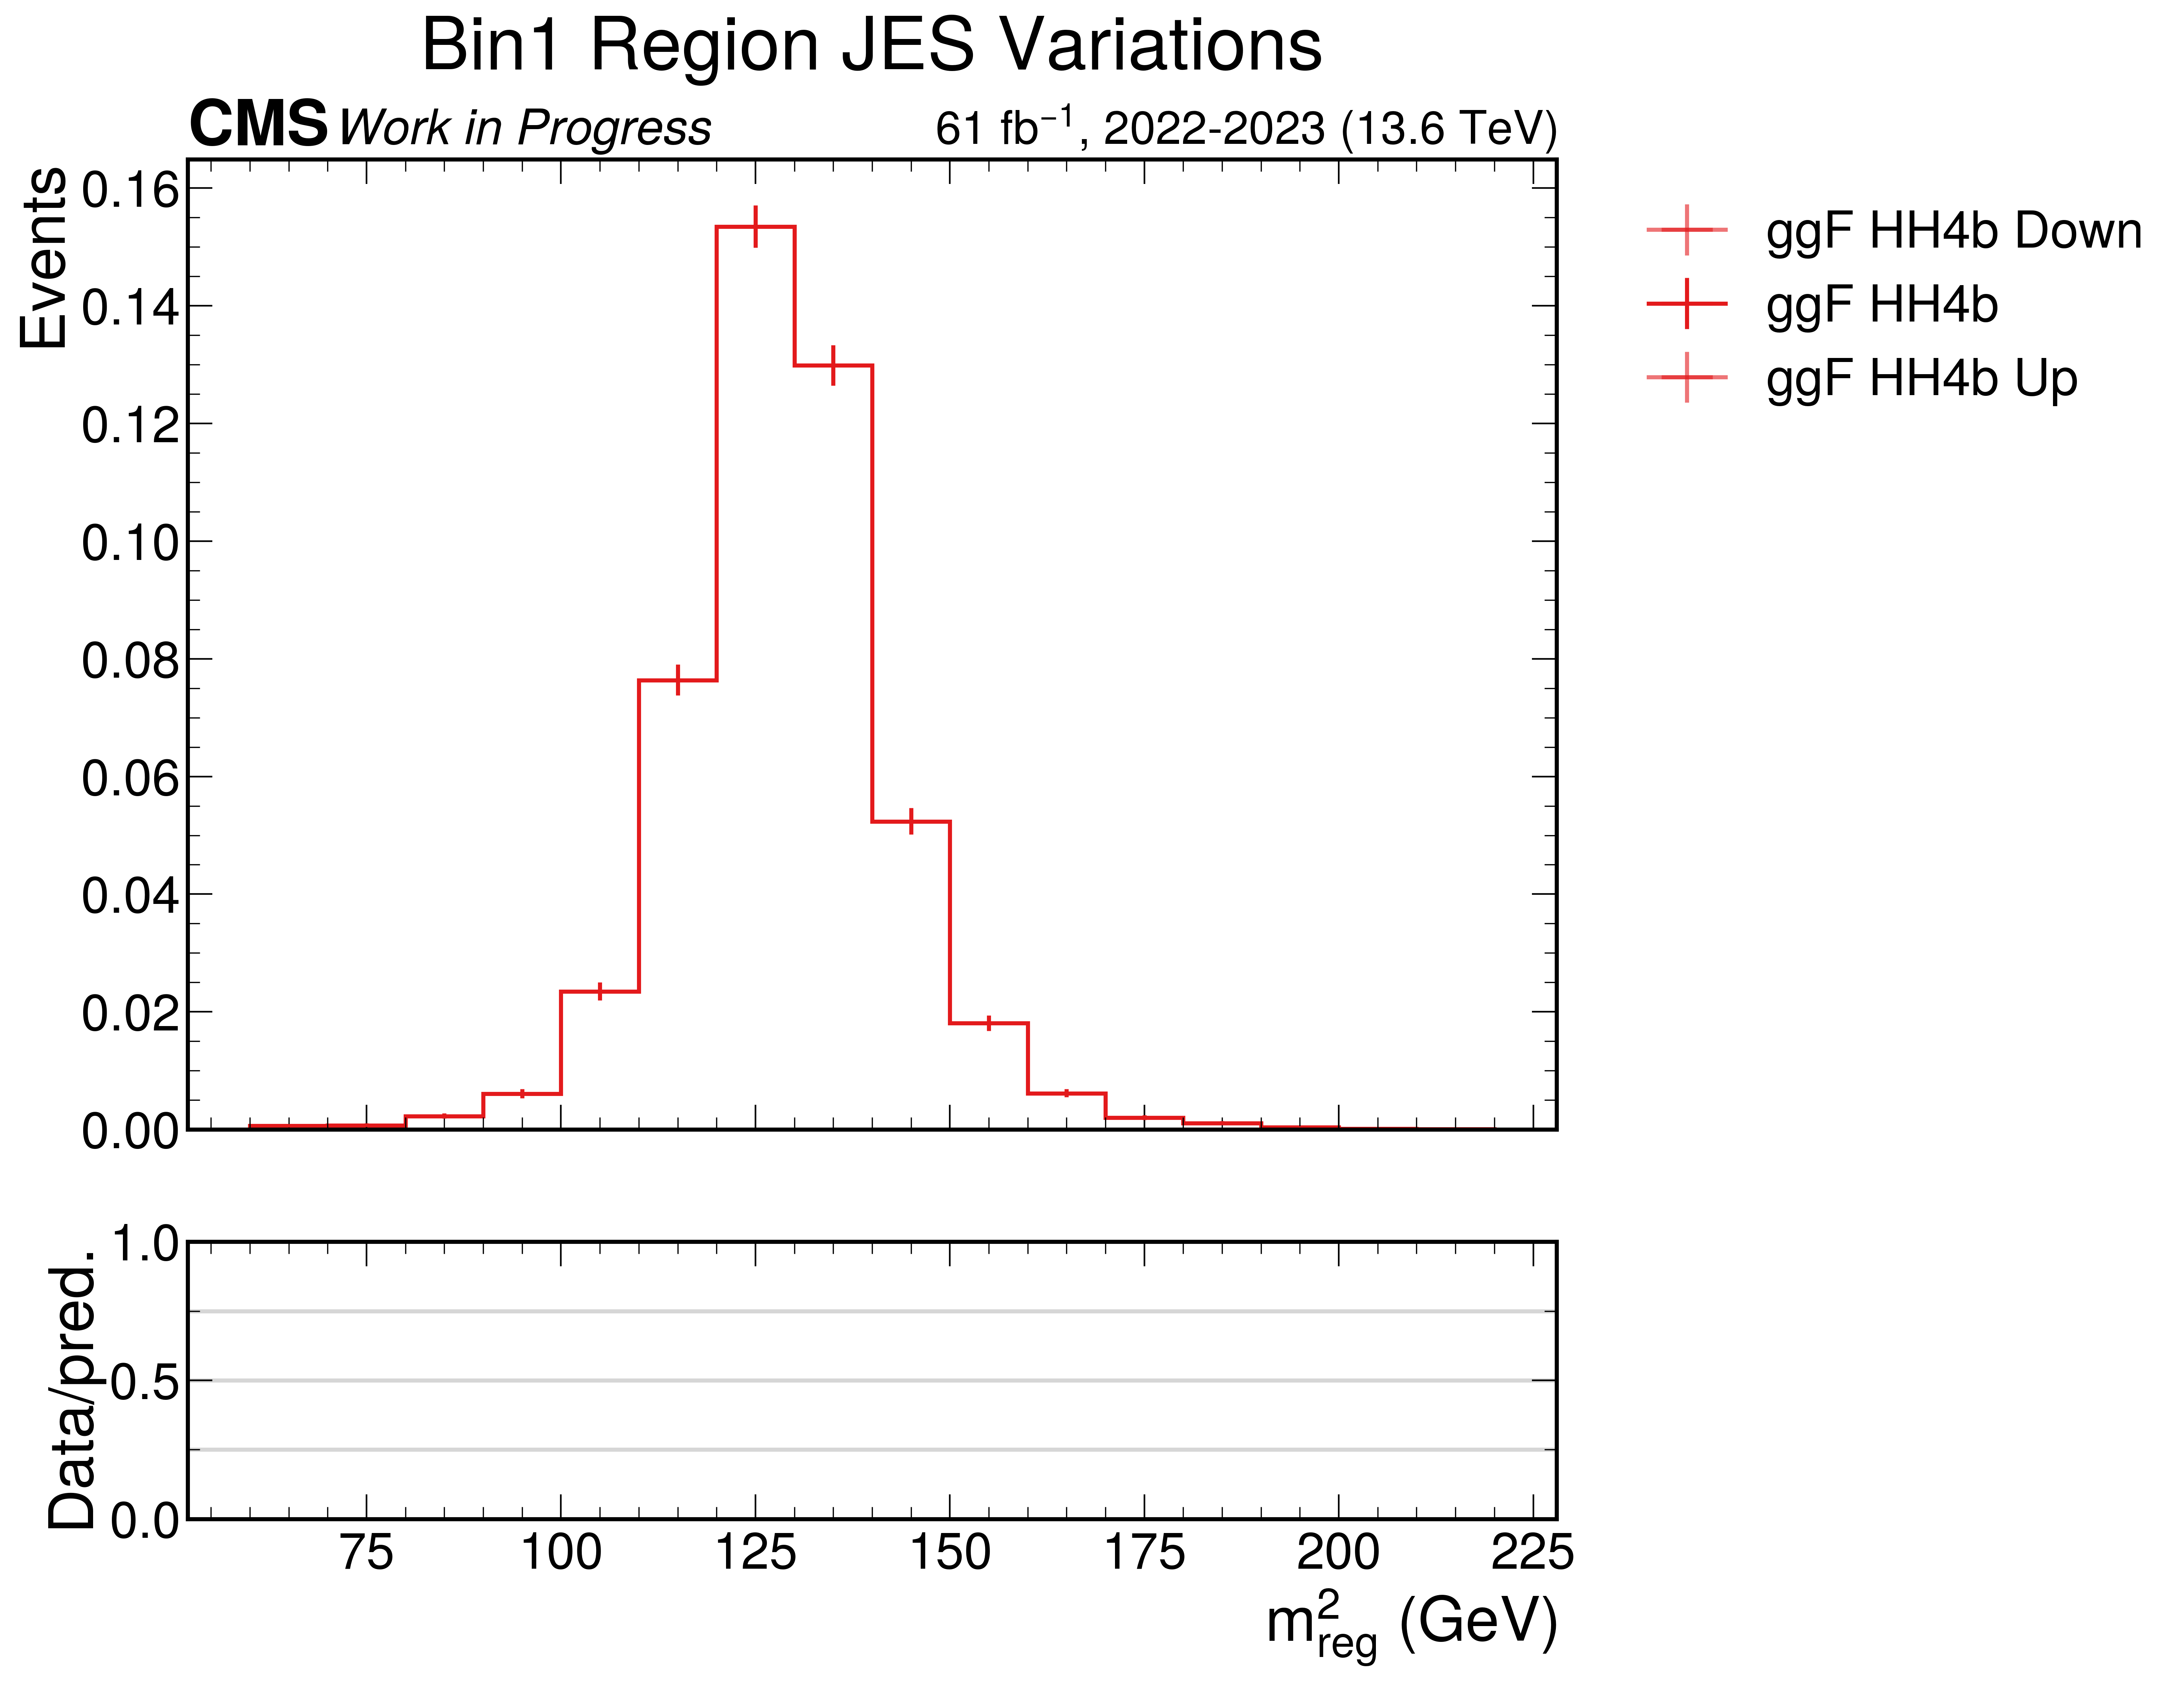

Hist(
  StrCategory(['data', 'hh4b', 'vbfhh4b-k2v0', 'qcd', 'hh4b_txbb_down', 'vbfhh4b-k2v0_txbb_down', 'hh4b_txbb_up', 'vbfhh4b-k2v0_txbb_up', 'data_JES_up', 'hh4b_JES_up', 'vbfhh4b-k2v0_JES_up', 'qcd_JES_up', 'data_JES_down', 'hh4b_JES_down', 'vbfhh4b-k2v0_JES_down', 'qcd_JES_down'], name='Sample'),
  Regular(16, 60, 220, name='H2PNetMass', label='$m^{2}_\\mathrm{reg}$ (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=969.956, variance=1913.85)


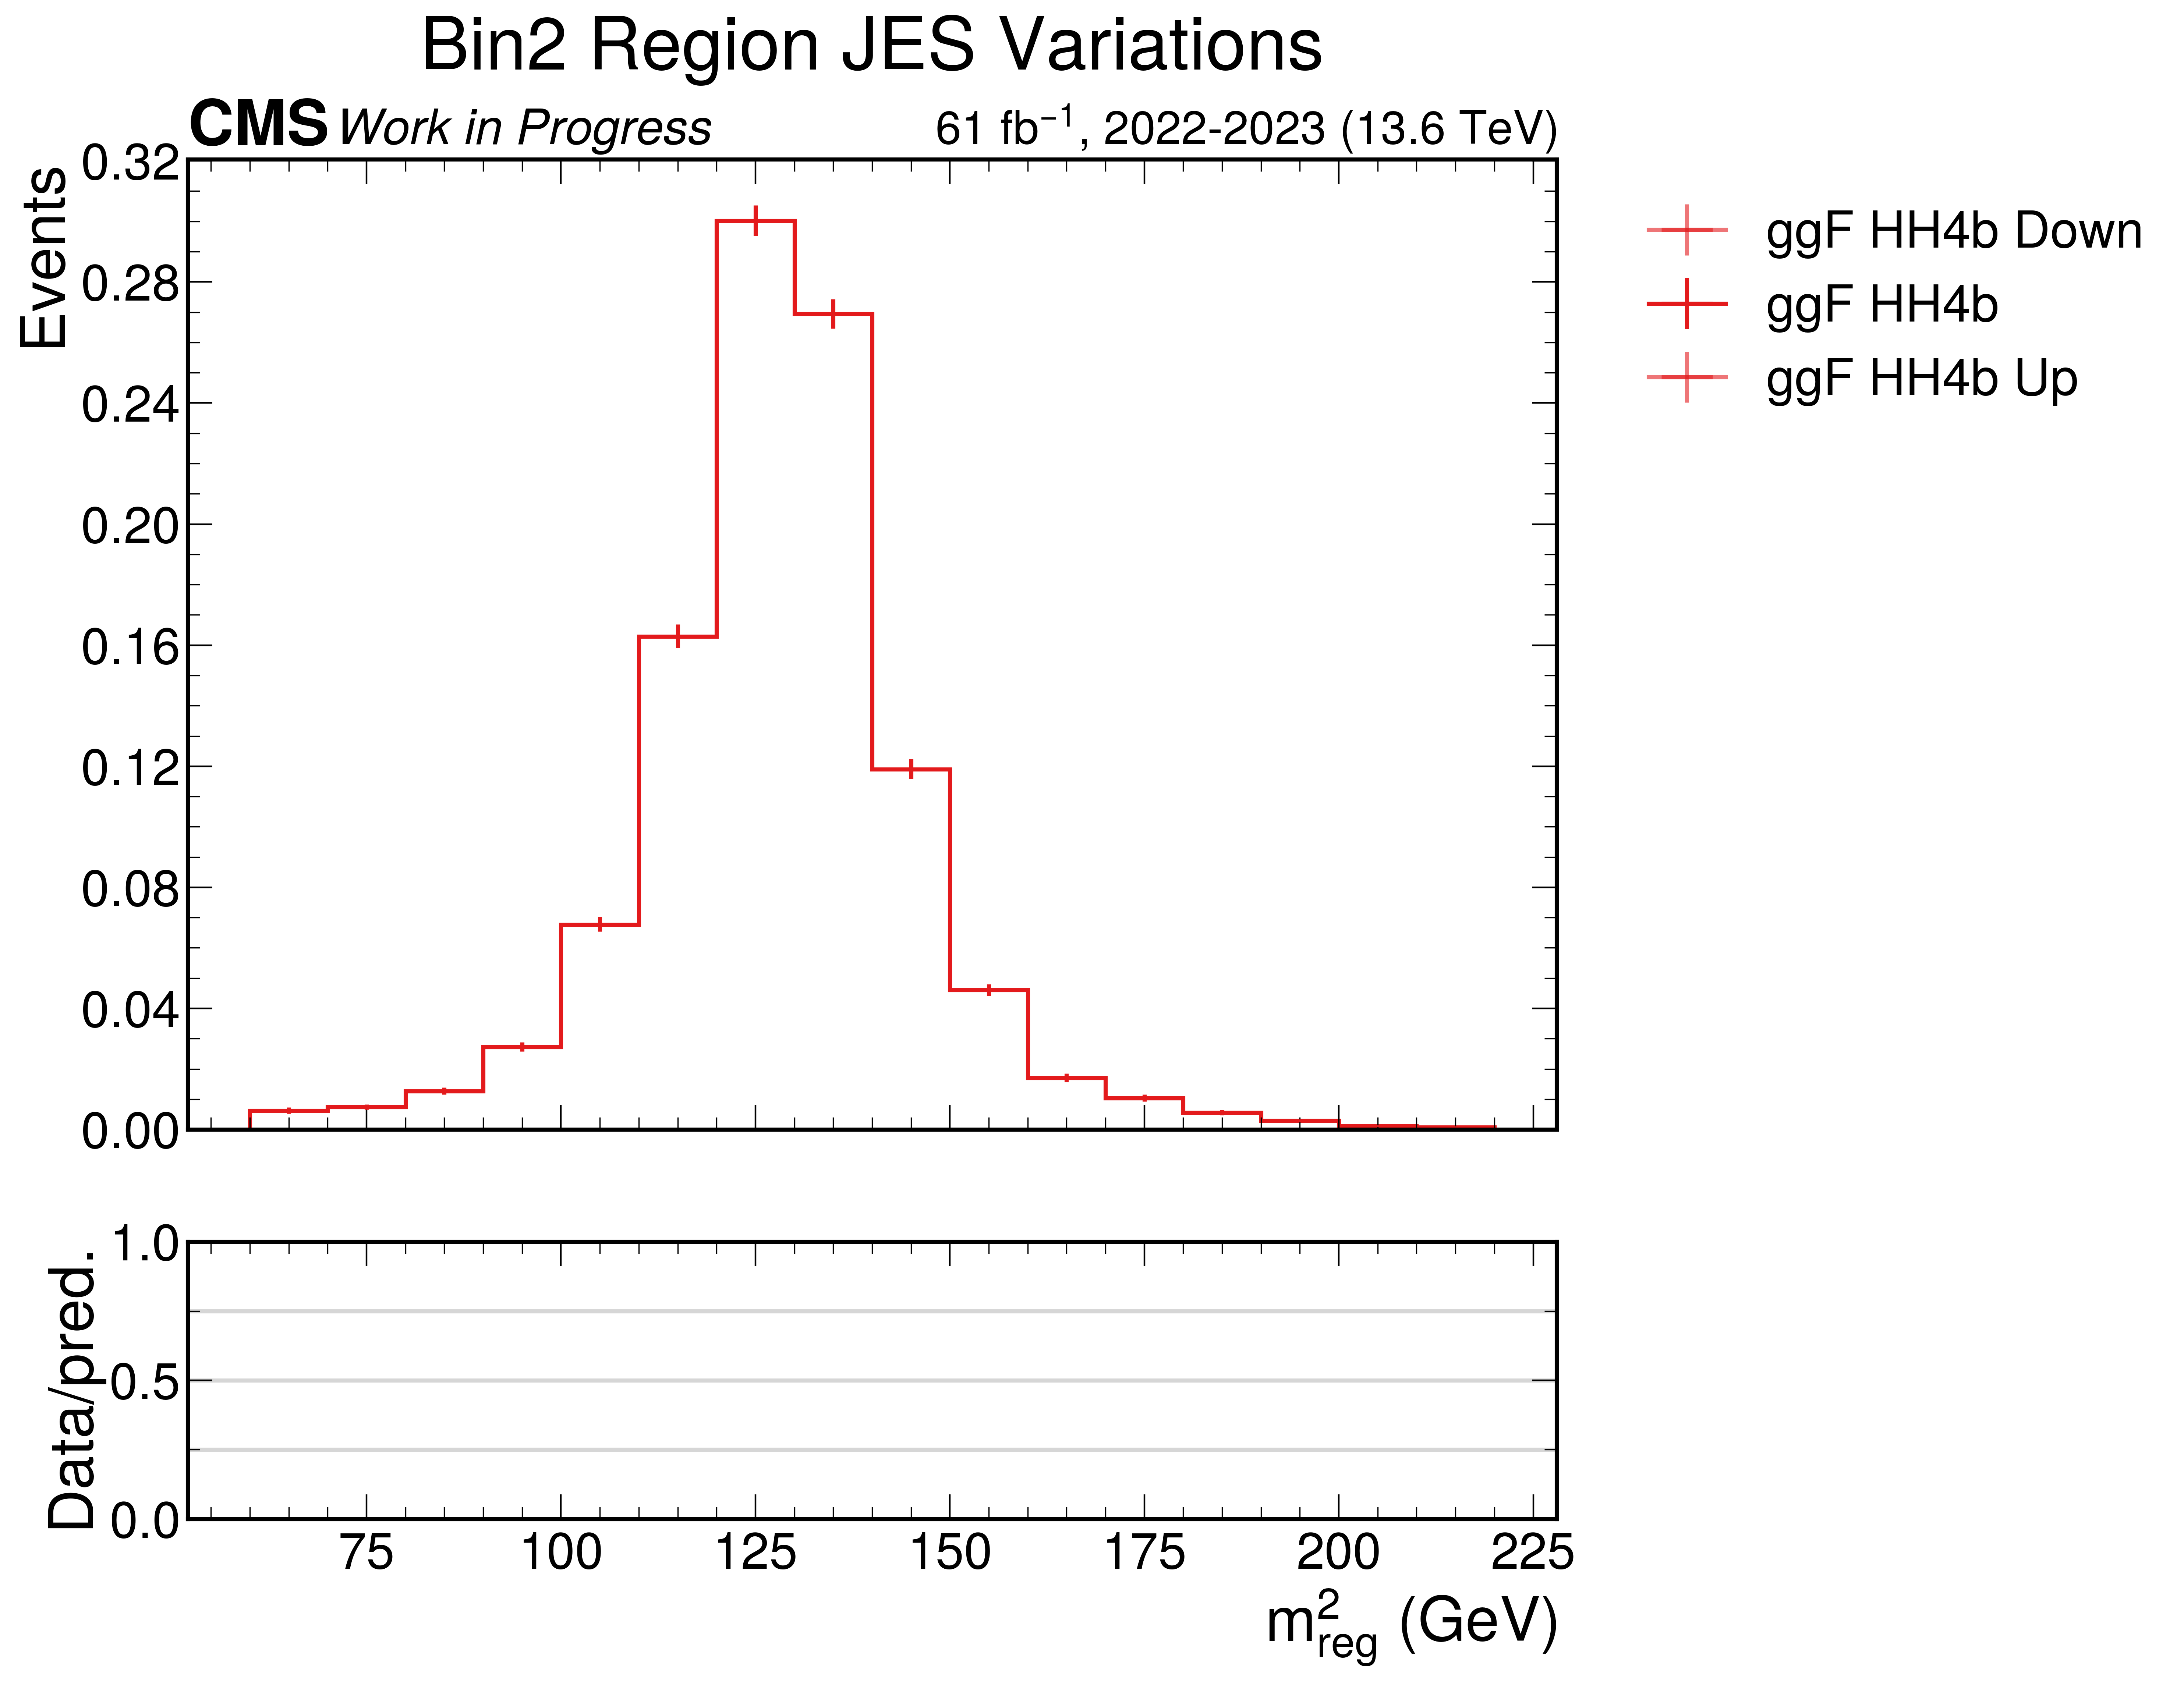

Hist(
  StrCategory(['data', 'hh4b', 'vbfhh4b-k2v0', 'qcd', 'hh4b_txbb_down', 'vbfhh4b-k2v0_txbb_down', 'hh4b_txbb_up', 'vbfhh4b-k2v0_txbb_up', 'data_JES_up', 'hh4b_JES_up', 'vbfhh4b-k2v0_JES_up', 'qcd_JES_up', 'data_JES_down', 'hh4b_JES_down', 'vbfhh4b-k2v0_JES_down', 'qcd_JES_down'], name='Sample'),
  Regular(16, 60, 220, name='H2PNetMass', label='$m^{2}_\\mathrm{reg}$ (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=29380.2, variance=63417.8) (WeightedSum(value=29381.6, variance=63418.9) with flow)


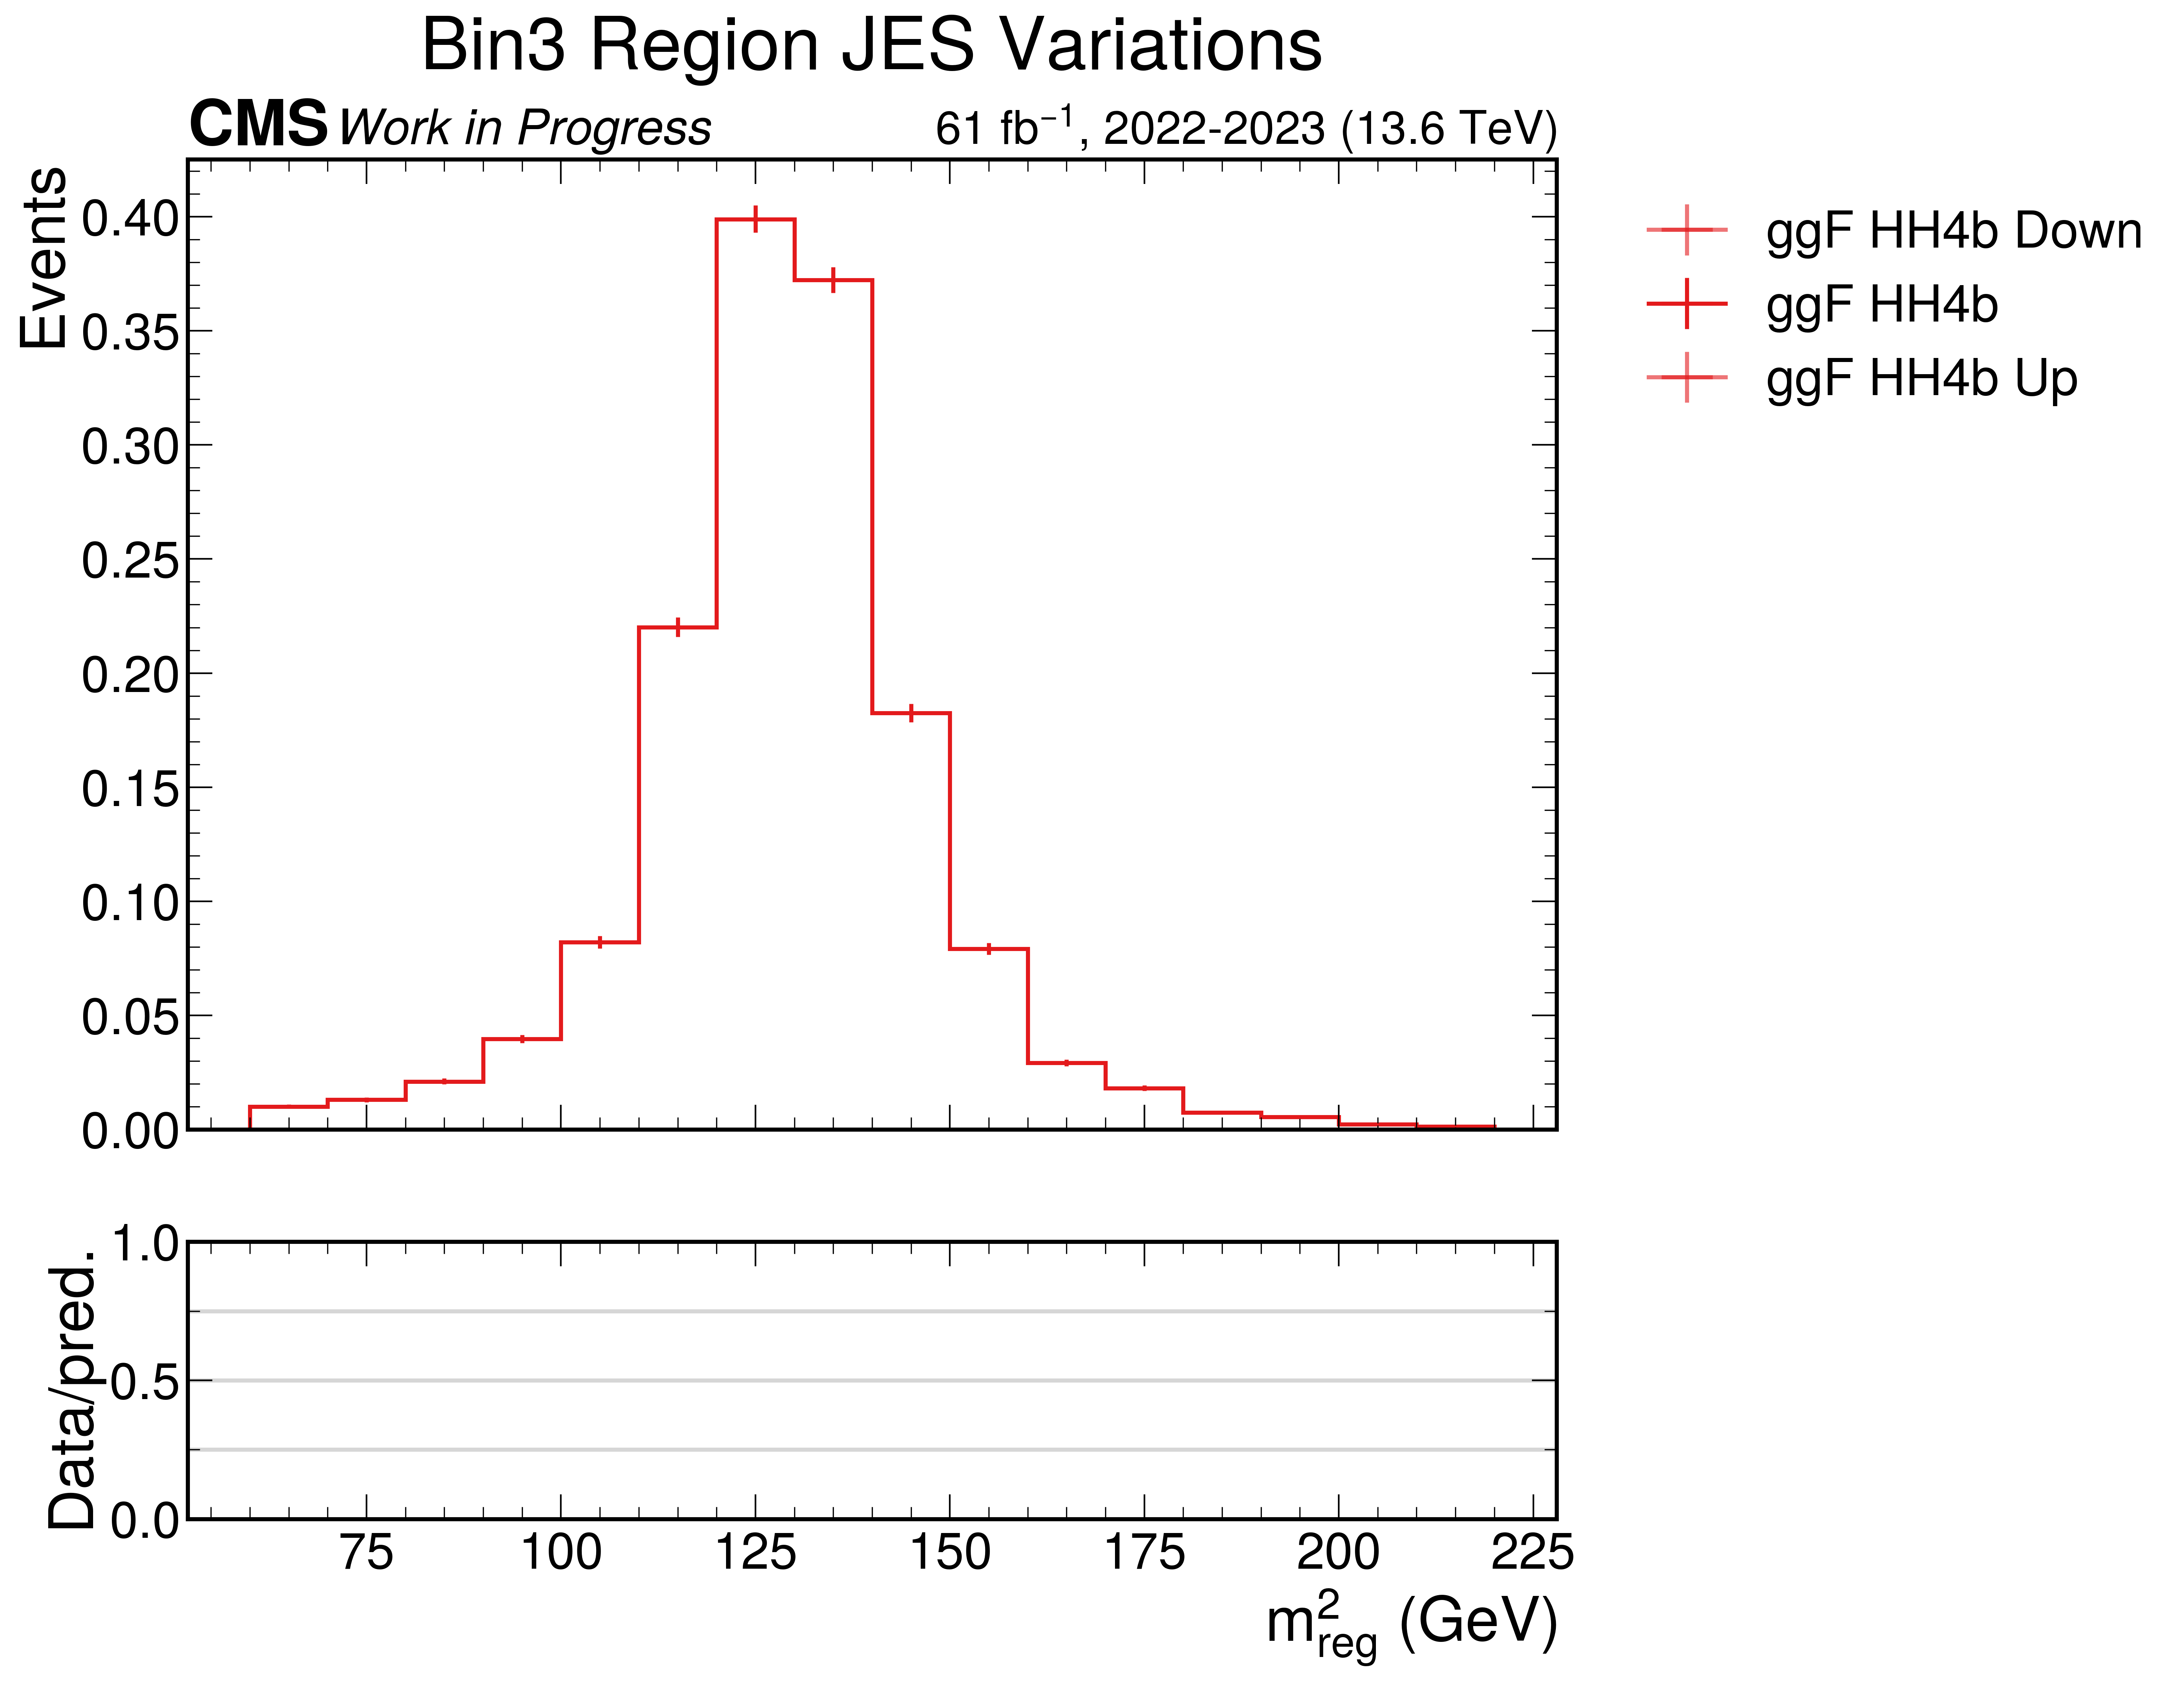

Hist(
  StrCategory(['data', 'hh4b', 'vbfhh4b-k2v0', 'qcd', 'data_JES_up', 'hh4b_JES_up', 'vbfhh4b-k2v0_JES_up', 'qcd_JES_up', 'data_JES_down', 'hh4b_JES_down', 'vbfhh4b-k2v0_JES_down', 'qcd_JES_down'], name='Sample'),
  Regular(16, 60, 220, name='H2PNetMass', label='$m^{2}_\\mathrm{reg}$ (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=5.98447e+06, variance=1.51488e+07) (WeightedSum(value=5.98458e+06, variance=1.51489e+07) with flow)


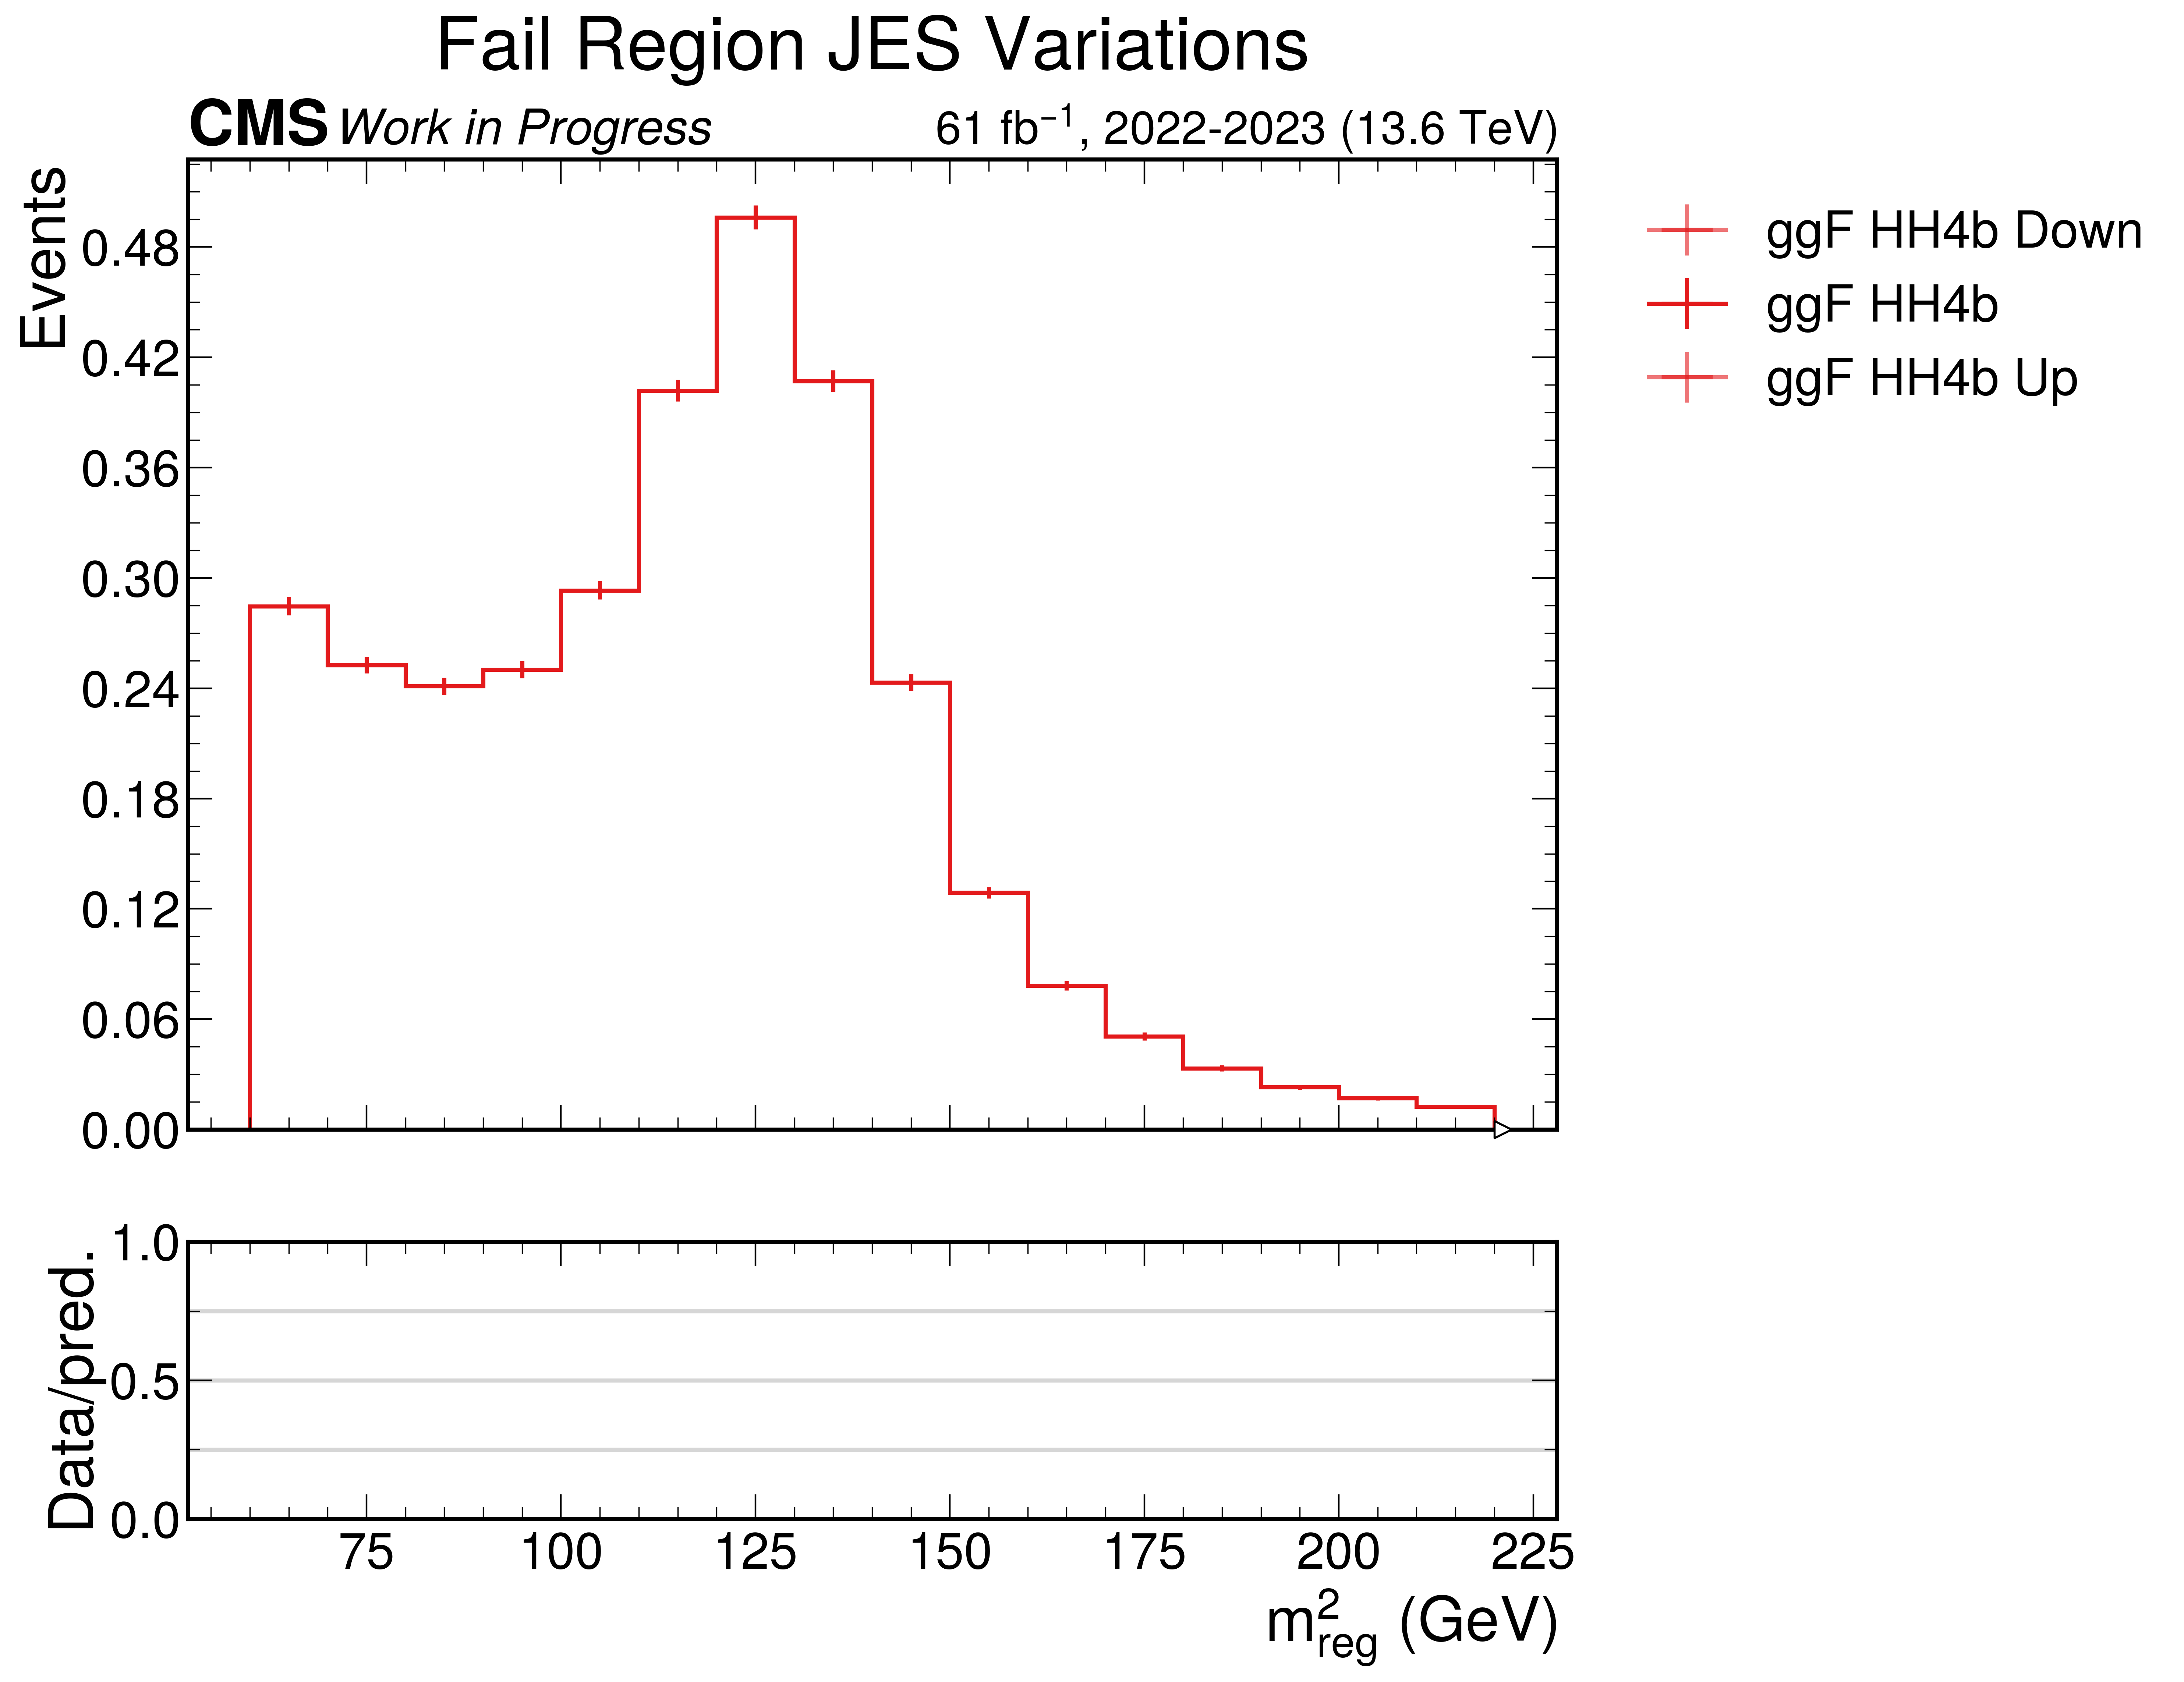

In [39]:
warnings.filterwarnings("ignore")

p_sig_keys = ["hh4b"]
p_bg_keys = bg_keys
p_all_keys = p_sig_keys + p_bg_keys

sig_scale_dict = {
    "hh4b": 1,
}

for rname, region in selection_regions.items():
    plot_dir = main_plot_dir / year / "wshifts"
    plot_dir.mkdir(exist_ok=True, parents=True)
    for wshift in list((jecs).keys()):
        if wshift in jecs:
            # adding jshift-ed histograms into the same histogram
            cjshift_templates = [templates[rname]]
            for shift in ["up", "down"]:
                # new histogram with sample names renamed to "{sample}_{jsf}_{shift}"
                jt = templates[f"{rname}_{wshift}_{shift}"]
                slabels = [f"{s}_{wshift}_{shift}" for s in jt.axes[0]]
                rjt = Hist(
                    hist.axis.StrCategory(slabels, name="Sample"),
                    *jt.axes[1:],
                    storage="weight",
                )
                rjt.view()[...] = jt.view()
                cjshift_templates.append(rjt)

                cjt = combine_hists(*cjshift_templates)
                shift_label = wshift
        else:
            shift_label = postprocessing.weight_shifts[wshift].label
            cjt = templates[rname]
        print(cjt)
        plotting.ratioHistPlot(
            cjt,
            year,
            p_sig_keys,
            [],
            sig_scale_dict=sig_scale_dict,
            syst=(wshift, p_sig_keys),
            title=f"{region.label} Region {wshift} Variations",
            plot_data=False,
            bg_err_type="line",
            # plot_signal=False,
            name=f"{plot_dir}/{rname}_bg_{wshift}.pdf",
            show=True,
        )